In [4]:
%pip install findspark
%pip install pyspark

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("app").getOrCreate()

In [7]:
from pyspark.sql.types import StructType, StructField, StringType

def criar_esquema_csv(campos):
    csvSchema = StructType([
        StructField(campo, StringType(), True) for campo in campos
    ])
    return csvSchema

In [34]:
campos = ['competênciamov', 'região', 'uf', 'município', 'seção', 'subclasse', 'saldomovimentação',
          'cbo2002ocupação', 'categoria', 'graudeinstrução', 'idade', 'horascontratuais', 'raçacor',
          'sexo', 'tipoempregador', 'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
          'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan', 'indicadoraprendiz',
          'origemdainformação', 'competênciadec', 'competênciaexc', 'indicadordeexclusão',
          'indicadordeforadoprazo', 'unidadesaláriocódigo', 'valorsaláriofixo', 'ano_mes']

schema_EXC = criar_esquema_csv(campos)

files_EXC_csv = []
for nome_arquivo in os.listdir(path_files):
    if nome_arquivo.startswith("CAGEDEXC") and nome_arquivo.endswith(".csv"):
        files_EXC_csv.append(path_files+"/"+nome_arquivo)
 
df_exc = spark.read.csv(files_EXC_csv, header=None, schema=schema_EXC, sep=';', encoding='utf-8')

In [10]:
campos = ['competênciamov', 'região', 'uf', 'município', 'seção', 'subclasse', 'saldomovimentação',
          'cbo2002ocupação', 'categoria', 'graudeinstrução', 'idade', 'horascontratuais', 'raçacor',
          'sexo', 'tipoempregador', 'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
          'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan', 'indicadoraprendiz',
          'origemdainformação', 'competênciadec', 'indicadordeforadoprazo', 
          'unidadesaláriocódigo', 'valorsaláriofixo', 'ano_mes']

schema = criar_esquema_csv(campos)

'''files_FOR_csv = []
for nome_arquivo in os.listdir(path_files):
    if nome_arquivo.startswith("CAGEDFOR") and nome_arquivo.endswith(".csv"):
        files_FOR_csv.append(path_files+"/"+nome_arquivo)
 
df_for= spark.read.csv(files_FOR_csv, header=None, schema=schema, sep=';', encoding='utf-8')'''

files_MOV_csv = []
for nome_arquivo in os.listdir(path_files):
    if nome_arquivo.startswith("CAGEDMOV") and nome_arquivo.endswith(".csv"):
        files_MOV_csv.append(path_files+"/"+nome_arquivo)
 
df_mov= spark.read.csv(files_MOV_csv, header=None, schema=schema, sep=';', encoding='utf-8')

In [58]:
df_exc.groupBy('ano_mes').count().orderBy('ano_mes').show()

+-------+-----+
|ano_mes|count|
+-------+-----+
| 202004|  780|
| 202005| 3871|
| 202006| 2768|
| 202007| 3136|
| 202008| 3823|
| 202009| 3424|
| 202010| 2882|
| 202011| 3090|
| 202012| 3154|
| 202101| 4553|
| 202102| 3592|
| 202103| 5983|
| 202104| 7688|
| 202105|31276|
| 202106|24404|
| 202107|10007|
| 202108|11625|
| 202109| 8087|
| 202110|23806|
| 202111|13631|
+-------+-----+
only showing top 20 rows



In [60]:
df_for.groupBy('ano_mes').count().orderBy('ano_mes').show()

+-------+------+
|ano_mes| count|
+-------+------+
| 202002| 87829|
| 202003|132678|
| 202004|239832|
| 202005|158679|
| 202006|133774|
| 202007|227940|
| 202008|127503|
| 202009|116028|
| 202010|123246|
| 202011|131832|
| 202012|156722|
| 202101|182458|
| 202102|195641|
| 202103|218746|
| 202104|238378|
| 202105|537224|
| 202106|316226|
| 202107|171865|
| 202108|243829|
| 202109|157879|
+-------+------+
only showing top 20 rows



In [36]:
df_mov.groupBy('ano_mes').count().orderBy('ano_mes').show()

+-------+-------+
|ano_mes|  count|
+-------+-------+
| 202001|2677294|
| 202002|2769296|
| 202003|2927646|
| 202004|2137605|
| 202005|1785450|
| 202006|1843463|
| 202007|2000499|
| 202008|2276599|
| 202009|2499928|
| 202010|2753866|
| 202011|2696726|
| 202012|2594612|
| 202101|2843091|
| 202102|3032935|
| 202103|3077440|
| 202104|2678700|
| 202105|2837927|
| 202106|2909460|
| 202107|3015377|
| 202108|3265478|
+-------+-------+
only showing top 20 rows



In [12]:
df_exc.count()

289477

In [13]:
df_for.count()

6335576

In [14]:
df_mov.count()

119458057

In [83]:
df_caged = df_mov.groupBy('tipomovimentação','cbo2002ocupação','ano_mes').count().orderBy('ano_mes')

In [84]:
df_caged.show()

+----------------+---------------+-------+-----+
|tipomovimentação|cbo2002ocupação|ano_mes|count|
+----------------+---------------+-------+-----+
|              45|         821445| 202001|   16|
|              31|         521125| 202001|10777|
|              31|         231305| 202001|  132|
|              90|         513405| 202001|  170|
|              20|         342310| 202001|  149|
|              31|         519940| 202001| 1355|
|              10|         422105| 202001| 1571|
|              31|         519905| 202001|  236|
|              20|         231210| 202001| 3802|
|              40|         351605| 202001|  786|
|              10|         828110| 202001|   48|
|              31|         322130| 202001|  298|
|              40|         715505| 202001|  639|
|              10|         515105| 202001|   33|
|              20|         517115| 202001|  379|
|              31|         763015| 202001|  146|
|              40|         354305| 202001|  141|
|              20|  

In [90]:
df_caged.select(col("cbo2002ocupação")).distinct().count()

2677

**Clusterização para as ocupações**

In [11]:
# Extrair uma amostra aleatória de 1% dos dados
df_mov10 = df_mov.sample(withReplacement=False, fraction=0.01, seed=42)

In [12]:
df_mov10_pd = df_mov10.toPandas()

In [39]:
df_mov10_pd.head()

,competênciamov,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,indtrabparcial,salário,tamestabjan,indicadoraprendiz,origemdainformação,competênciadec,indicadordeforadoprazo,unidadesaláriocódigo,valorsaláriofixo,ano_mes
0,202001,3,31,314610,F,4211101,1,710210,101,4,...,0,"3238,11",3,0,1,202001,0,5,"3238,11",202001
1,202001,3,33,330455,G,4722901,-1,521125,999,5,...,0,"1234,57",5,0,2,202001,0,99,None,202001
2,202001,2,29,292870,N,7830200,1,862305,101,7,...,0,"1275,56",9,0,1,202001,0,5,"1275,56",202001
3,202001,2,27,270930,G,4731800,-1,521135,101,7,...,0,"1039,00",2,0,1,202001,0,5,"1039,00",202001
4,202001,3,35,355030,F,4330404,-1,717020,101,7,...,0,"1513,92",3,0,1,202001,0,5,"1513,92",202001


In [40]:
print(f'O dataset possui {df_mov10_pd.shape[1]} colunas')

O dataset possui 29 colunas


In [151]:
df_mov10_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194791 entries, 0 to 1194790
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   competênciamov          1194791 non-null  object
 1   região                  1194791 non-null  object
 2   uf                      1194791 non-null  object
 3   município               1194791 non-null  object
 4   seção                   1194791 non-null  object
 5   subclasse               1194791 non-null  object
 6   saldomovimentação       1194791 non-null  object
 7   cbo2002ocupação         1194791 non-null  object
 8   categoria               1194791 non-null  object
 9   graudeinstrução         1194791 non-null  object
 10  idade                   1194724 non-null  object
 11  horascontratuais        1193339 non-null  object
 12  raçacor                 1194791 non-null  object
 13  sexo                    1194791 non-null  object
 14  tipoempregador    

In [44]:
print(df_mov10_pd.isnull().sum())

competênciamov                0
região                        0
uf                            0
município                     0
seção                         0
subclasse                     0
saldomovimentação             0
cbo2002ocupação               0
categoria                     0
graudeinstrução               0
idade                        67
horascontratuais           1452
raçacor                       0
sexo                          0
tipoempregador                0
tipoestabelecimento           0
tipomovimentação              0
tipodedeficiência             0
indtrabintermitente           0
indtrabparcial                0
salário                     511
tamestabjan                   0
indicadoraprendiz             0
origemdainformação            0
competênciadec                0
indicadordeforadoprazo        0
unidadesaláriocódigo          0
valorsaláriofixo          45208
ano_mes                       0
dtype: int64


In [14]:
# Excluir os registros que foram gerados equivocadamente com o nome da coluna
# Basta excluir um que os demais serão removidos em conjunto
df_mov10_pd = df_mov10_pd.loc[df_mov10_pd['competênciamov'] != 'competênciamov']

In [15]:
colunas_nulas = df_mov10_pd.columns[df_mov10_pd.isnull().any()].tolist()

In [16]:
for coluna in colunas_nulas:
    print(coluna)
    # Converter a coluna para tipo numérico
    df_mov10_pd.loc[:, coluna] = df_mov10_pd[coluna].str.replace(',', '.').str.strip()
    df_mov10_pd.loc[:, coluna] = pd.to_numeric(df_mov10_pd[coluna], errors='coerce')

idade


C:\Users\thiago.silva\AppData\Local\Temp\ipykernel_22424\1914490398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov10_pd.loc[:, coluna] = df_mov10_pd[coluna].str.replace(',', '.').str.strip()
C:\Users\thiago.silva\AppData\Local\Temp\ipykernel_22424\1914490398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov10_pd.loc[:, coluna] = pd.to_numeric(df_mov10_pd[coluna], errors='coerce')
C:\Users\thiago.silva\AppData\Local\Temp\ipykernel_22424\1914490398.py:5: DeprecationWarning: In a future ve

horascontratuais


C:\Users\thiago.silva\AppData\Local\Temp\ipykernel_22424\1914490398.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mov10_pd.loc[:, coluna] = df_mov10_pd[coluna].str.replace(',', '.').str.strip()


salário
valorsaláriofixo


In [17]:
# Iterar sobre as colunas com nulos para imputar os valores nulos considerando quem está
# na mesma UF, mesma CBO, mesmo grau de instrução e mesmo sexo
for coluna in colunas_nulas:
    print(coluna)
    # Calcular a média dos valores não nulos para cada combinação 
    media_valores = df_mov10_pd.groupby(['uf', 'cbo2002ocupação','graudeinstrução','sexo'])[coluna].mean()
    # Juntar os valores médios calculados de volta ao DataFrame original
    df_mov10_pd = df_mov10_pd.merge(media_valores, on=['uf', 'cbo2002ocupação','graudeinstrução','sexo'], suffixes=('', '_media'))
    # Substituir os valores nulos pela média correspondente
    df_mov10_pd[coluna].fillna(df_mov10_pd[coluna+'_media'], inplace=True)
    # Remover a coluna de médias, se necessário
    df_mov10_pd.drop(columns=[coluna+'_media'], inplace=True)

idade
horascontratuais
salário
valorsaláriofixo


In [18]:
# Removendo registros que ainda contenham valores ausentes em razão de não ter sido possível montar
# um agrupamento de 'uf', 'cbo2002ocupação','graudeinstrução','sexo' que tivesse mais de um registro.
# Nesse caso, os registros serão removidos
for coluna in colunas_nulas:
    print(coluna)
    df_mov10_pd = df_mov10_pd.dropna(subset=[coluna])

idade
horascontratuais
salário
valorsaláriofixo


In [18]:
# Vale observar se ainda há dados ausentes
check_for_nan = df_mov10_pd.isnull().values.any()
check_for_nan

False

In [237]:
df_mov10_pd_transposed = df_mov10_pd.transpose()
print(df_mov10_pd_transposed.iloc[:, :5])

                              0        1        2            3        4
competênciamov           202001   202110   202203       202001   202001
região                        3        3        3            3        3
uf                           31       31       31           33       33
município                314610   314610   312610       330455   330455
seção                         F        F        F            G        G
subclasse               4211101  4211101  4211101      4722901  4712100
saldomovimentação             1        1        1           -1        1
cbo2002ocupação          710210   710210   710210       521125   521125
categoria                   101      101      101          999      101
graudeinstrução               4        4        4            5        5
idade                      53.0     35.0     41.0         47.0     28.0
horascontratuais           44.0     44.0     44.0         44.0     44.0
raçacor                       3        1        3            3  

In [19]:
# Preparando dados para a correlação

# Obter a lista de colunas
colunas = df_mov10_pd.columns.tolist()

# Colunas a serem removidas da lista
valores_remover = ['seção','competênciamov','indicadordeforadoprazo','uf','região']

# Remover os valores da lista de colunas
colunas = [coluna for coluna in colunas if coluna not in valores_remover]

# Iterar sobre as colunas
for coluna in colunas:
    # Verificar se a coluna contém apenas valores numéricos
    if pd.to_numeric(df_mov10_pd[coluna], errors='coerce').notnull().all():
        # Converter a coluna para tipo numérico
        df_mov10_pd[coluna] = pd.to_numeric(df_mov10_pd[coluna])

In [294]:
df_mov10_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192727 entries, 0 to 1194789
Data columns (total 29 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   competênciamov          1192727 non-null  object 
 1   região                  1192727 non-null  int64  
 2   uf                      1192727 non-null  object 
 3   município               1192727 non-null  int64  
 4   seção                   1192727 non-null  object 
 5   subclasse               1192727 non-null  int64  
 6   saldomovimentação       1192727 non-null  int64  
 7   cbo2002ocupação         1192727 non-null  int64  
 8   categoria               1192727 non-null  int64  
 9   graudeinstrução         1192727 non-null  int64  
 10  idade                   1192727 non-null  float64
 11  horascontratuais        1192727 non-null  float64
 12  raçacor                 1192727 non-null  int64  
 13  sexo                    1192727 non-null  int64  
 14  ti

Matriz de Correlação


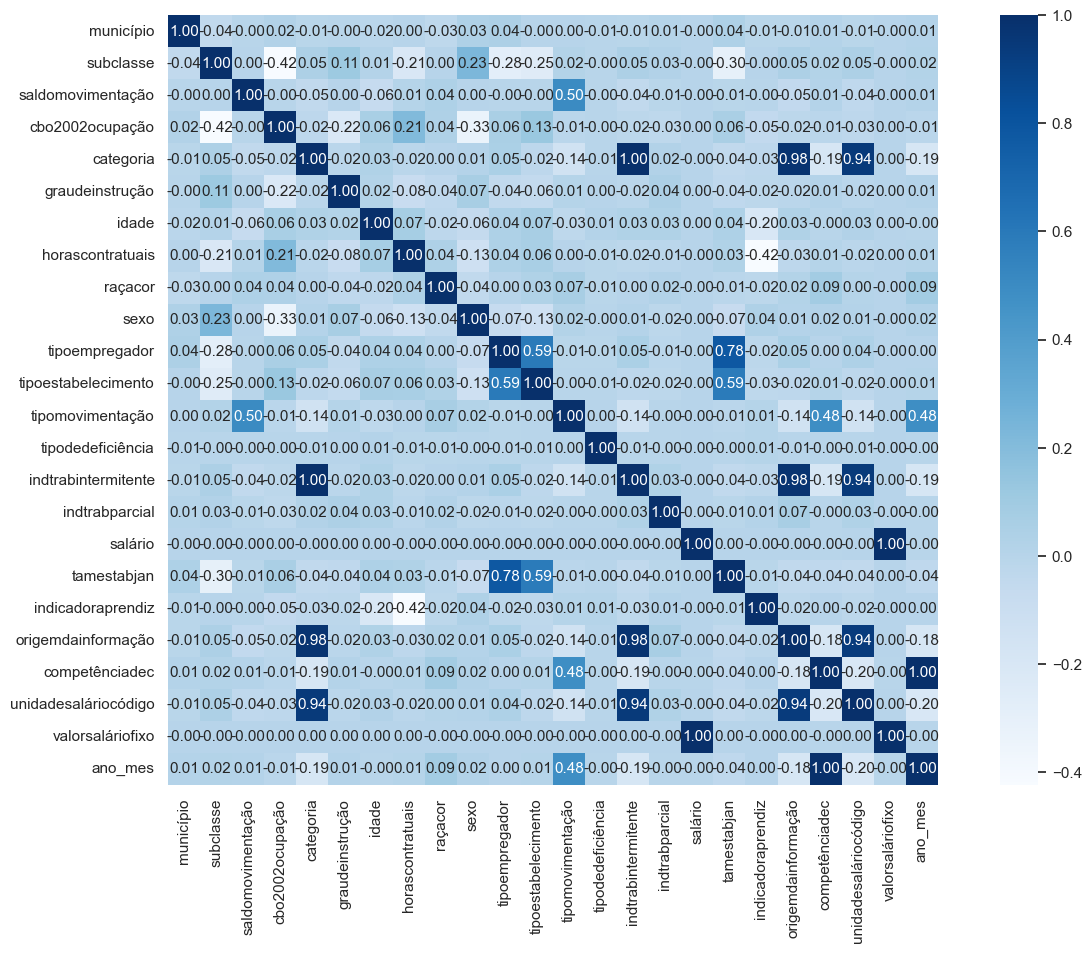

In [299]:
# Cálculo da correlação nos dados e apresentação gráfica do resultado
print("Matriz de Correlação")
cm = np.corrcoef(df_mov10_pd[colunas].values.T)
sns.set_theme(font_scale=1,rc = {'figure.figsize':(16,10)})
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 11}, 
                 yticklabels=colunas, 
                 xticklabels=colunas, 
                 cmap='Blues')
plt.show()

In [300]:
# Obter a lista de colunas
colunas = df_mov10_pd.columns.tolist()
colunas

['competênciamov',
 'região',
 'uf',
 'município',
 'seção',
 'subclasse',
 'saldomovimentação',
 'cbo2002ocupação',
 'categoria',
 'graudeinstrução',
 'idade',
 'horascontratuais',
 'raçacor',
 'sexo',
 'tipoempregador',
 'tipoestabelecimento',
 'tipomovimentação',
 'tipodedeficiência',
 'indtrabintermitente',
 'indtrabparcial',
 'salário',
 'tamestabjan',
 'indicadoraprendiz',
 'origemdainformação',
 'competênciadec',
 'indicadordeforadoprazo',
 'unidadesaláriocódigo',
 'valorsaláriofixo',
 'ano_mes']

**Iniciando a análise de componentes principais**

In [337]:
from sklearn.preprocessing import StandardScaler 
 
X = df_mov10_pd.drop(columns=valores_remover)
X_std = StandardScaler().fit_transform(X)

In [338]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

X_pca = pca.fit_transform(X_std)

In [339]:
pca.components_

array([[-7.88420646e-03,  3.18762146e-02, -5.43104194e-02,
        -1.87869732e-02,  4.73880318e-01, -7.20778154e-03,
         1.99660456e-02, -1.50257500e-02, -1.20468978e-02,
         8.71078697e-03,  1.63233511e-02, -2.01292080e-02,
        -1.57490387e-01, -3.30178000e-03,  4.73429742e-01,
         2.48220033e-02,  1.81147989e-04, -2.37161716e-02,
        -1.39638093e-02,  4.70629430e-01, -2.03934395e-01,
         4.63134450e-01,  3.16319941e-04, -2.03934395e-01],
       [ 3.26814232e-02, -3.64817015e-01, -2.93437624e-02,
         2.46663100e-01, -8.17033023e-03, -1.14305443e-01,
         7.27549946e-02,  1.61203135e-01,  6.67401271e-03,
        -2.00161225e-01,  4.88560550e-01,  4.58246122e-01,
        -7.47578721e-02, -4.90744181e-03, -8.75319750e-03,
        -2.38346076e-02,  1.76232141e-03,  4.93551626e-01,
        -7.77103144e-02, -9.92413772e-03, -8.61094516e-02,
        -1.05114278e-02,  1.77001367e-03, -8.61094516e-02]])

In [340]:
pca.explained_variance_

array([4.1154069 , 2.64809366])

In [341]:
pca.explained_variance_ratio_

array([0.17147514, 0.11033714])

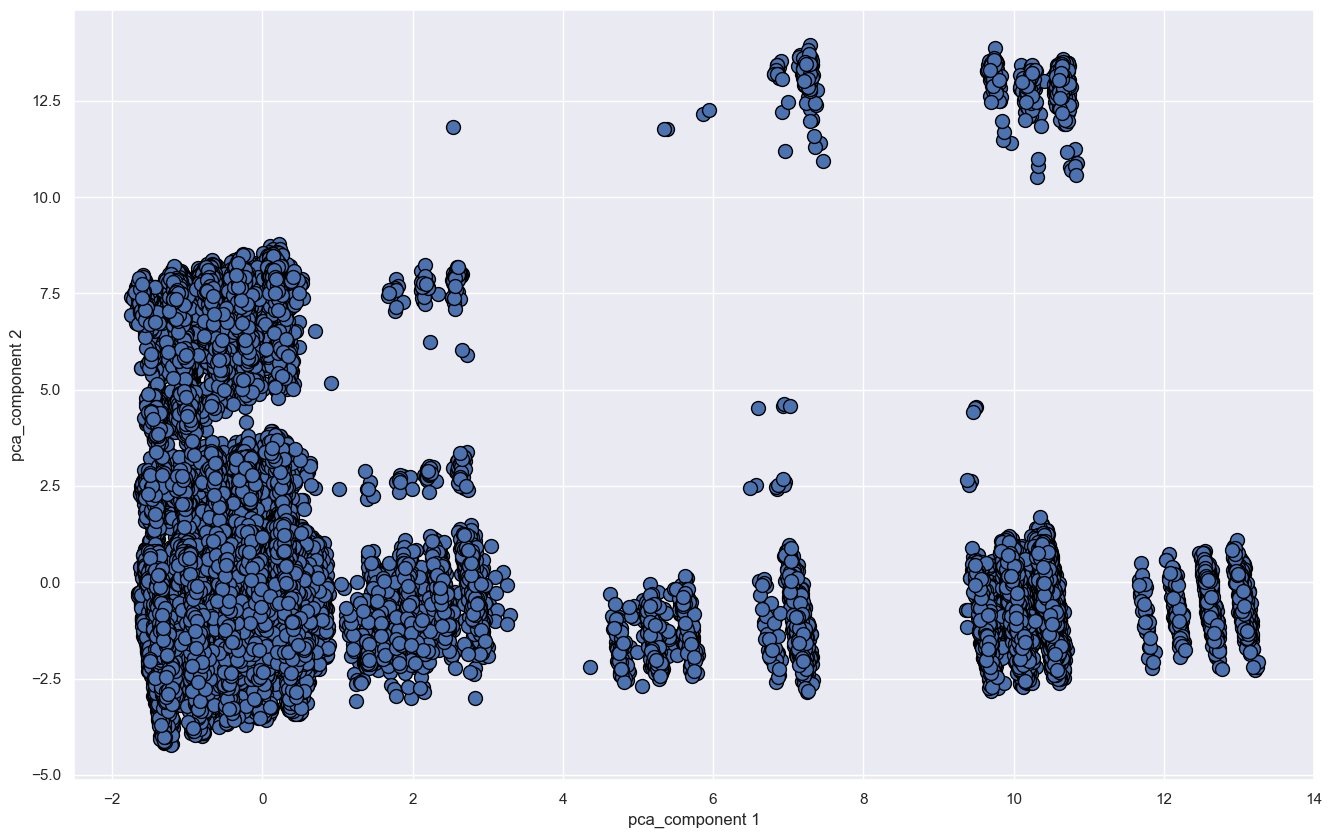

In [307]:
plt.scatter(X_pca[:,0], X_pca[:,1], edgecolor='black', s=100)
plt.xlabel('pca_component 1')
plt.ylabel('pca_component 2')
plt.show()

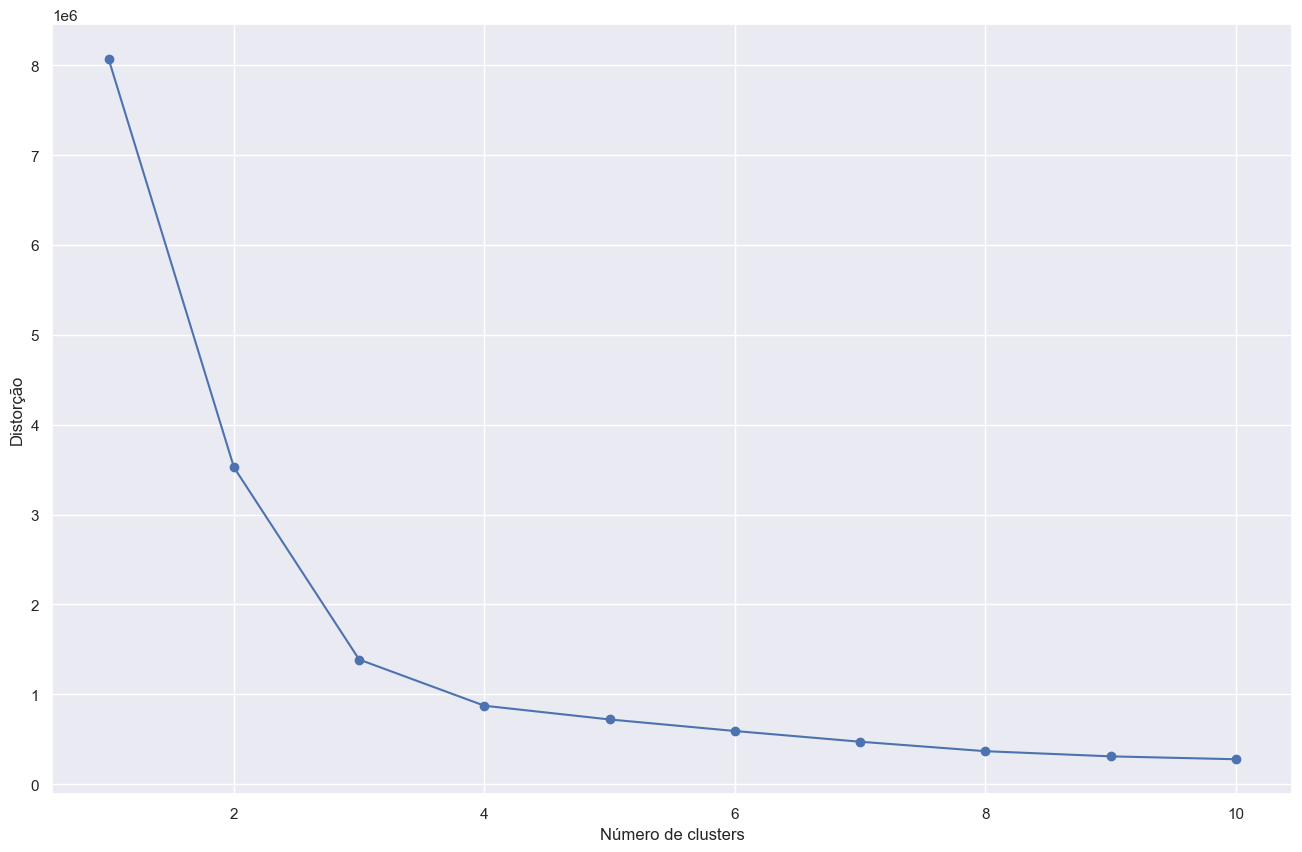

In [308]:
from sklearn.cluster import KMeans

#Aplicando o método do cotovelo para identificação do número ideal de clusters
distortions = []
for i in range (1,11):
    km = KMeans(
            n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=42)
    km.fit(X_pca)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Distorção')
plt.show;

In [ ]:
from sklearn.metrics import silhouette_samples

#Aplicando uma adaptação no método da silhueta para identificação do número ideal de clusters
silhueta=[]
for i in range (2,11):
    km = KMeans(
            n_clusters=i,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=42)
    y = km.fit_predict(X_pca)
    
    silhouette_vals = silhouette_samples(
        X_pca,
        y,
        metric='euclidean')

    silhouette_avg = np.mean(silhouette_vals)
    silhueta.append(silhouette_avg)

plt.plot(range(2,11), silhueta, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhueta')
plt.show;

In [342]:
kmeans = KMeans(
            n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300,
            random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

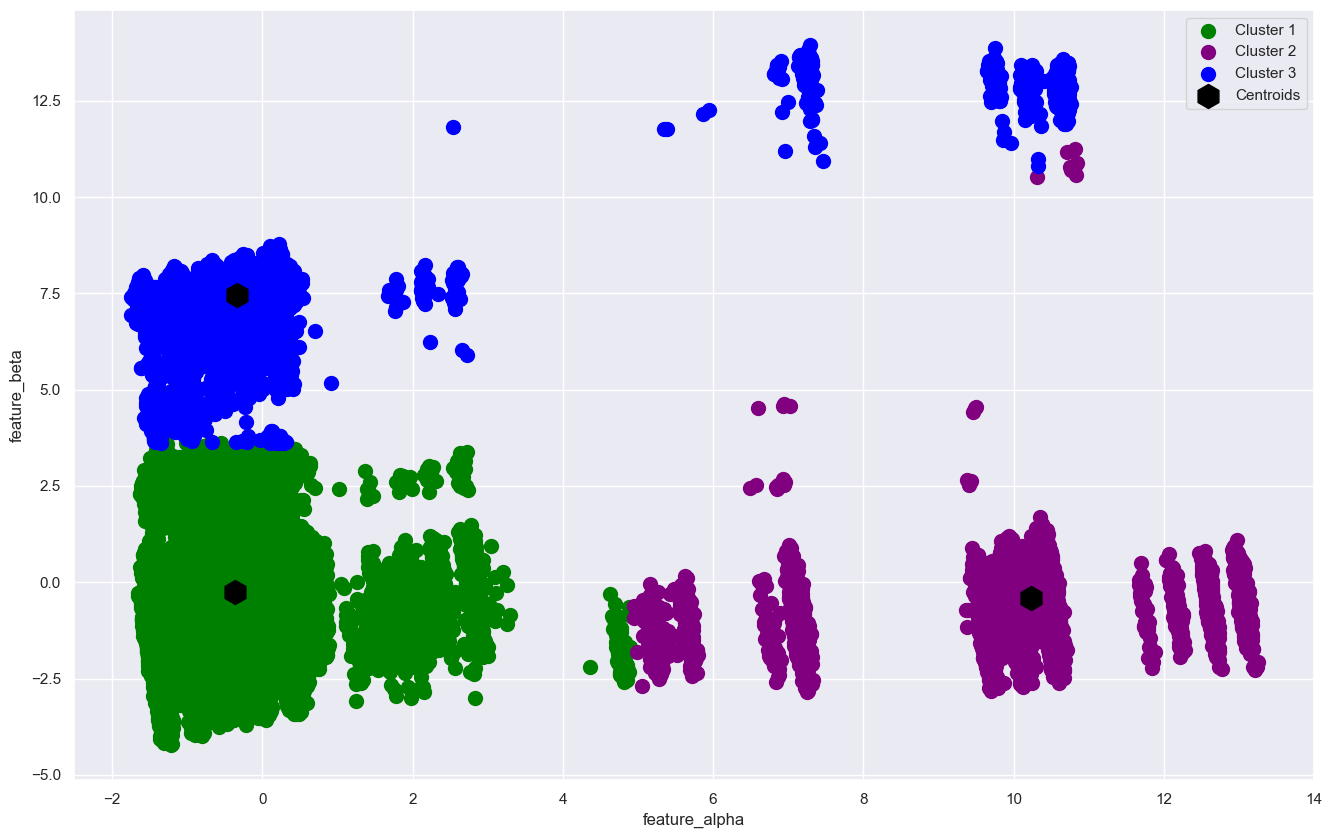

In [311]:
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='green', label='Cluster 1')
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='purple', label='Cluster 2')
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='blue', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='h')
plt.xlabel('feature_alpha')
plt.ylabel('feature_beta')
plt.legend()
plt.show()

In [20]:
# Carregar os dados do CAGED em df_mov10_pd (se já não estiver carregado)

# Converter a coluna 'ano_mes' para o formato de data
df_mov10_pd['ano_mes'] = pd.to_datetime(df_mov10_pd['ano_mes'], format='%Y%m')

# Calcular a soma da coluna 'saldomovimentação' mês a mês
resultado = df_mov10_pd.groupby(['cbo2002ocupação', 'ano_mes'])['saldomovimentação'].sum()

# Resetar o índice do resultado para transformá-lo em um DataFrame
resultado = resultado.reset_index()

# Renomear a coluna de soma para 'saldo_mes_ano'
resultado = resultado.rename(columns={'saldomovimentação': 'saldo_mes_ano'})

# Agregar os dados calculados ao DataFrame original df_mov10_pd usando a função merge()
df_mov10_pd = pd.merge(df_mov10_pd, resultado, on=['cbo2002ocupação', 'ano_mes'], how='left')

In [386]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Carregar o dataset
df = df_mov10_pd

# Selecionar as colunas relevaantes
columns = ['município', 'graudeinstrução', 'sexo', 'cbo2002ocupação', 'saldo_mes_ano']
df_selected = df[columns]

# Codificar as variáveis categóricas
encoder = LabelEncoder()
df_selected['município'] = encoder.fit_transform(df_selected['município'])
df_selected['graudeinstrução'] = encoder.fit_transform(df_selected['graudeinstrução'])
df_selected['sexo'] = encoder.fit_transform(df_selected['sexo'])
df_selected['saldo_mes_ano'] = encoder.fit_transform(df_selected['saldo_mes_ano'])

# Executar o K-means
k = 3  # número de clusters desejado
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_selected[['município', 'graudeinstrução', 'sexo', 'saldo_mes_ano']])

# Adicionar os rótulos dos clusters ao DataFrame
df_selected['cluster'] = kmeans.labels_

C:\Users\thiago.silva\AppData\Local\Temp\ipykernel_24276\314170567.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['município'] = encoder.fit_transform(df_selected['município'])
C:\Users\thiago.silva\AppData\Local\Temp\ipykernel_24276\314170567.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['graudeinstrução'] = encoder.fit_transform(df_selected['graudeinstrução'])
C:\Users\thiago.silva\AppData\Local\Temp\ipykernel_24276\314170567.py:16: SettingWithCopyWarning: 
A value is 

In [388]:
# Calcular o centróide de cada cluster
centroids = kmeans.cluster_centers_

# Encontrar os pontos de dados mais próximos aos centróides
df_selected['distance_to_centroid'] = kmeans.transform(
    df_selected[['município', 'graudeinstrução', 'sexo','saldo_mes_ano']]).min(axis=1)

# Encontrar a cbo2002ocupação correspondente ao centróide de cada cluster
centroid_cbo = []
for cluster in range(k):
    centroid_idx = df_selected[df_selected['cluster'] == cluster]['distance_to_centroid'].idxmin()
    centroid_cbo.append(df_selected.loc[centroid_idx, 'cbo2002ocupação'])

# Exibir as cbo2002ocupação dos centróides de cada cluster
for cluster, cbo in enumerate(centroid_cbo):
    print(f"Cluster {cluster+1}: CBO2002ocupação - {cbo}")

Cluster 1: CBO2002ocupação - 783225
Cluster 2: CBO2002ocupação - 724315
Cluster 3: CBO2002ocupação - 521130


C:\Users\thiago.silva\AppData\Local\Temp\ipykernel_24276\928303495.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['distance_to_centroid'] = kmeans.transform(


In [21]:
# Converter a coluna 'ano_mes' para o formato de data
df_mov10_pd['ano_mes'] = pd.to_datetime(df_mov10_pd['ano_mes'], format='%Y%m')

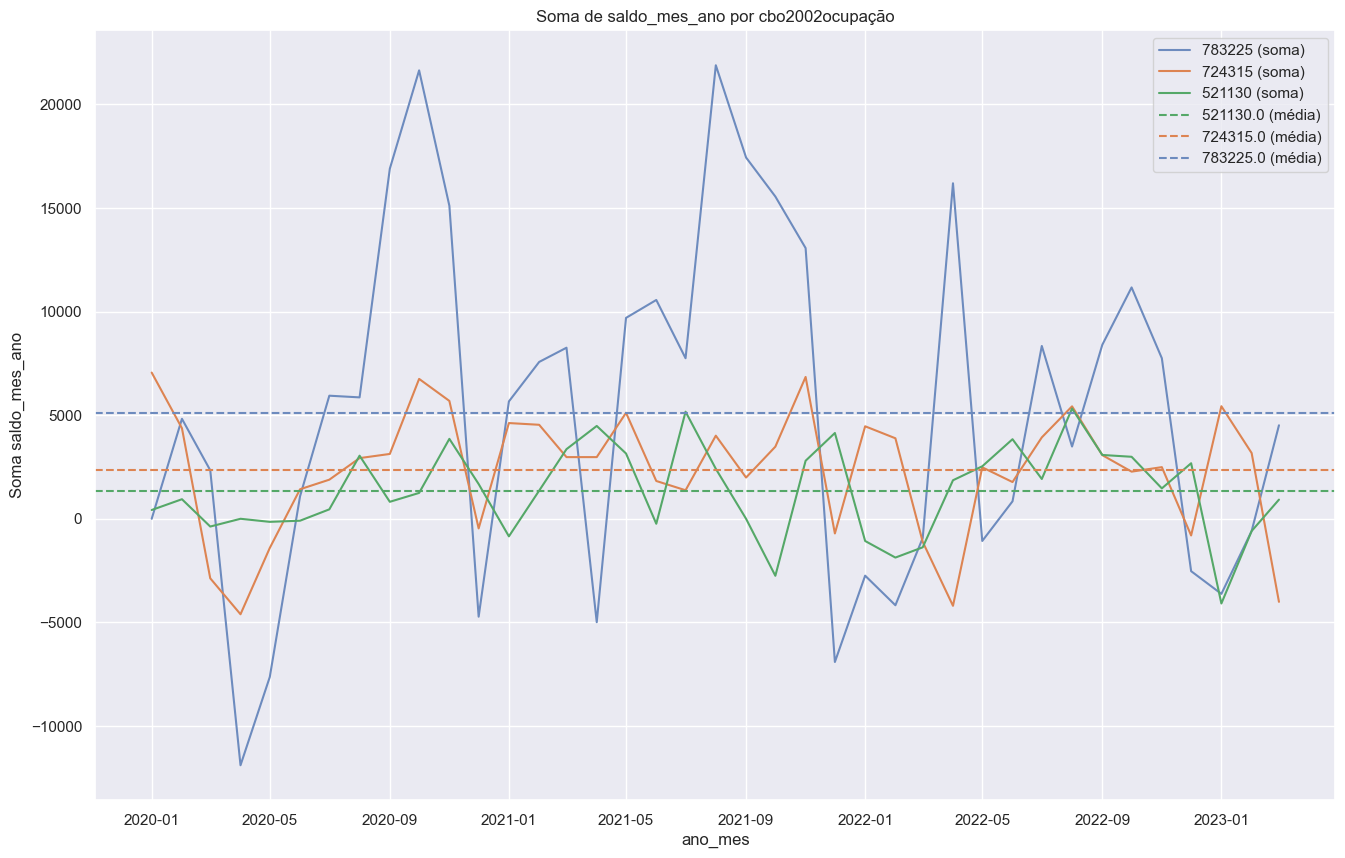

In [403]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CAGED em df_mov10_pd (se já não estiver carregado)

# Converter a coluna 'ano_mes' para o formato de data
df_mov10_pd['ano_mes'] = pd.to_datetime(df_mov10_pd['ano_mes'], format='%Y%m')

# Filtrar os dados para os códigos de cbo2002ocupação desejados
cbo_codes = [783225, 724315, 521130]
df_filtered = df_mov10_pd[df_mov10_pd['cbo2002ocupação'].isin(cbo_codes)]

# Calcular a soma de 'saldo_mes_ano' para cada 'ano_mes' e 'cbo2002ocupação'
df_grouped = df_filtered.groupby(['ano_mes', 'cbo2002ocupação'])['saldo_mes_ano'].sum().reset_index()

# Calcular a média histórica de 'saldo_mes_ano' para cada 'cbo2002ocupação'
df_mean = df_grouped.groupby('cbo2002ocupação')['saldo_mes_ano'].mean().reset_index()

# Definir as cores para cada 'cbo2002ocupação' usando valores RGB (0-255)
cbo_colors = {
    783225: (109, 139, 190),   # Azul
    724315: (221, 132, 82),   # Verde
    521130: (85, 168, 104)    # Vermelho
}

# Converter os valores RGB para o formato correto (0-1)
cbo_colors = {cbo: tuple(color / 255 for color in rgb) for cbo, rgb in cbo_colors.items()}

# Criar uma figura e um objeto de eixos
fig, ax = plt.subplots()

# Iterar sobre os códigos de cbo2002ocupação e criar uma linha para cada um
for cbo_code in cbo_codes:
    df_cbo = df_grouped[df_grouped['cbo2002ocupação'] == cbo_code]
    color = cbo_colors[cbo_code]
    ax.plot(df_cbo['ano_mes'], df_cbo['saldo_mes_ano'], label=f'{cbo_code} (soma)', color=color)

# Adicionar linhas para representar a média histórica de 'saldo_mes_ano' para cada 'cbo2002ocupação'
for _, row in df_mean.iterrows():
    cbo_code = row['cbo2002ocupação']
    mean_value = row['saldo_mes_ano']
    color = cbo_colors[cbo_code]
    ax.axhline(mean_value, linestyle='--', color=color, label=f'{cbo_code} (média)')

# Configurar o título do gráfico e os rótulos dos eixos
ax.set_title('Soma de saldo_mes_ano por cbo2002ocupação')
ax.set_xlabel('ano_mes')
ax.set_ylabel('Soma saldo_mes_ano')

# Adicionar uma legenda ao gráfico
ax.legend()

# Exibir o gráfico
plt.show()

In [26]:
arquivo_layout = 'C:/Users/thiago.silva/TCC/CAGED/Layout Novo Caged.xlsx'
aba_interesse = 'cbo2002ocupação'

# Carregue o arquivo Excel
df_cbo = pd.read_excel(arquivo_layout, sheet_name=aba_interesse)

# Acesse as descrições dos CBOs de interesse
cbo_interesse = [783225, 724315, 521130]

# Filtrar as linhas do DataFrame que correspondem aos CBOs de interesse
df_interesse = df_cbo[df_cbo['Código'].isin(cbo_interesse)]

# Exibir as descrições dos CBOs de interesse
print(df_interesse[['Código', 'Descrição']])

      Código                           Descrição
1612  521130  Atendente de Farmacia - Balconista
2015  724315                            Soldador
2409  783225               Ajudante de Motorista


**ANÁLISE DE SOBREVIVÊNCIA DE ATIVIDADE ECONÔMICA**

In [22]:
import numpy as np

# Recodificar a variável 'tipomovimentação' para criar a coluna 'flag_demissao'
df_mov10_pd['flag_demissao'] = np.where(
    (df_mov10_pd['tipomovimentação'] >= 31) & (df_mov10_pd['tipomovimentação'] <= 33) |
    (df_mov10_pd['tipomovimentação'] >= 40) & (df_mov10_pd['tipomovimentação'] <= 45) |
    (df_mov10_pd['tipomovimentação'] >= 50) & (df_mov10_pd['tipomovimentação'] <= 60) |
    (df_mov10_pd['tipomovimentação'] == 80) | (df_mov10_pd['tipomovimentação'] == 90) |
    (df_mov10_pd['tipomovimentação'] == 98),
    1,
    0
)

In [ ]:
!pip install lifelines

In [24]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from datetime import datetime, timedelta

Grupo 1: CBO 783225 (Ajudante de Motorista)
Quantos meses para atingir a mínima probabilidade de sobrevivência: 72.0 (02/2029)
Probabilidade de sobrevivência: 14.304457594068392

Grupo 2: CBO 724315 (Soldador)
Quantos meses para atingir a mínima probabilidade de sobrevivência: 43.0 (08/2026)
Probabilidade de sobrevivência: 15.82717111123686

Grupo 3: CBO 521130 (Atendente de Farmacia - Balconista)
Quantos meses para atingir a mínima probabilidade de sobrevivência: 34.0 (11/2025)
Probabilidade de sobrevivência: 15.651570644981646


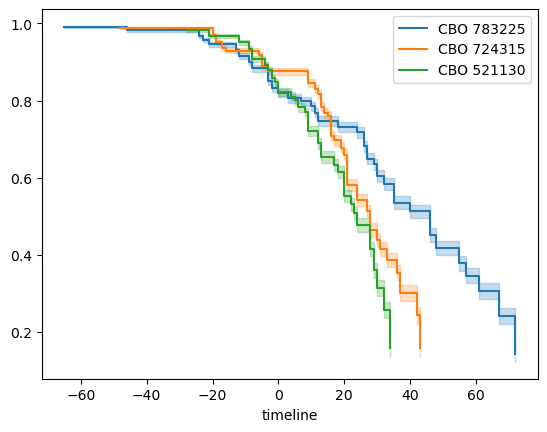

In [28]:
# Criar grupos
grupo1 = df_mov10_pd[df_mov10_pd['cbo2002ocupação'] == 783225]
grupo2 = df_mov10_pd[df_mov10_pd['cbo2002ocupação'] == 724315]
grupo3 = df_mov10_pd[df_mov10_pd['cbo2002ocupação'] == 521130]

# Definir tamanho mínimo para os grupos
min_size = min(grupo1.shape[0], grupo2.shape[0], grupo3.shape[0])

# Selecionar amostras aleatórias dos grupos
grupo1 = grupo1.sample(n=min_size, random_state=42)
grupo2 = grupo2.sample(n=min_size, random_state=42)
grupo3 = grupo3.sample(n=min_size, random_state=42)

# Verificar o comprimento dos dados
assert len(grupo1) == len(grupo2) == len(grupo3), "Os grupos têm comprimentos diferentes."

# Inicializar o estimador de Kaplan-Meier
kmf = KaplanMeierFitter()

# Definir a data base como março/2023
data_base = datetime(2023, 3, 1)

# Grupo 1
kmf.fit(grupo1['saldo_mes_ano'], grupo1['flag_demissao'], label='CBO 783225')
grupo1_survival = kmf.survival_function_
# Plote a curva de sobrevivência
kmf.plot_survival_function()
# Obter os valores da timeline e probabilidade para o Grupo 1
timeline_grupo = kmf.timeline
probabilidade_grupo = kmf.survival_function_

# Criar um DataFrame vazio
df = pd.DataFrame()
# Calcular a data resultante adicionando meses à data base
data_resultante = data_base + timedelta(days=30.44*timeline_grupo[-1])  # considerando 30.44 dias em um mês
# Criar a coluna com os meses e anos decorrentes
df['MesAnoDecorrente'] = pd.date_range(start=data_base, end=data_resultante, freq='M').strftime('%m/%Y')
# Obter o último valor da coluna "MesAnoDecorrente"
ultimo_valor = df['MesAnoDecorrente'].iloc[-1]

# Usando a função loc para obter a descrição correspondente ao código
descricao = df_interesse.loc[df_interesse['Código'] == 783225, 'Descrição'].values[0]

# Imprimir os valores para o Grupo 1
print(f'Grupo 1: CBO 783225 ({descricao})')
print(f'Quantos meses para atingir a mínima probabilidade de sobrevivência: {timeline_grupo[-1]} ({ultimo_valor})')
print('Probabilidade de sobrevivência: '+str(probabilidade_grupo['CBO 783225'].iloc[-1]*100))
print()

# Grupo 2
kmf.fit(grupo2['saldo_mes_ano'], grupo2['flag_demissao'], label='CBO 724315')
grupo2_survival = kmf.survival_function_
# Plote a curva de sobrevivência
kmf.plot_survival_function()
# Obter os valores da timeline e probabilidade para o Grupo 1
timeline_grupo = kmf.timeline
probabilidade_grupo = kmf.survival_function_

# Criar um DataFrame vazio
df = pd.DataFrame()
# Calcular a data resultante adicionando meses à data base
data_resultante = data_base + timedelta(days=30.44*timeline_grupo[-1])  # considerando 30.44 dias em um mês
# Criar a coluna com os meses e anos decorrentes
df['MesAnoDecorrente'] = pd.date_range(start=data_base, end=data_resultante, freq='M').strftime('%m/%Y')
# Obter o último valor da coluna "MesAnoDecorrente"
ultimo_valor = df['MesAnoDecorrente'].iloc[-1]

# Usando a função loc para obter a descrição correspondente ao código
descricao = df_interesse.loc[df_interesse['Código'] == 724315, 'Descrição'].values[0]

# Imprimir os valores para o Grupo 2
print(f'Grupo 2: CBO 724315 ({descricao})')
print(f'Quantos meses para atingir a mínima probabilidade de sobrevivência: {timeline_grupo[-1]} ({ultimo_valor})')
print('Probabilidade de sobrevivência: '+str(probabilidade_grupo['CBO 724315'].iloc[-1]*100))
print()

# Grupo 3
kmf.fit(grupo3['saldo_mes_ano'], grupo3['flag_demissao'], label='CBO 521130')
grupo3_survival = kmf.survival_function_
# Plote a curva de sobrevivência
kmf.plot_survival_function()
# Obter os valores da timeline e probabilidade para o Grupo 1
timeline_grupo = kmf.timeline
probabilidade_grupo = kmf.survival_function_

# Criar um DataFrame vazio
df = pd.DataFrame()
# Calcular a data resultante adicionando meses à data base
data_resultante = data_base + timedelta(days=30.44*timeline_grupo[-1])  # considerando 30.44 dias em um mês
# Criar a coluna com os meses e anos decorrentes
df['MesAnoDecorrente'] = pd.date_range(start=data_base, end=data_resultante, freq='M').strftime('%m/%Y')
# Obter o último valor da coluna "MesAnoDecorrente"
ultimo_valor = df['MesAnoDecorrente'].iloc[-1]

# Usando a função loc para obter a descrição correspondente ao código
descricao = df_interesse.loc[df_interesse['Código'] == 521130, 'Descrição'].values[0]
     
# Imprimir os valores para o Grupo 3
print(f'Grupo 3: CBO 521130 ({descricao})')
print(f'Quantos meses para atingir a mínima probabilidade de sobrevivência: {timeline_grupo[-1]} ({ultimo_valor})')
print('Probabilidade de sobrevivência: '+str(probabilidade_grupo['CBO 521130'].iloc[-1]*100))